# Fundamentos de Aprendizaje Automático
## _Práctica 3: Regresión Logística y Análisis ROC_
### _Grupo 1461_
#### _Rubén Torralba Manso y Alejandro Monterrubio Navarro_

## Apartado 1: Resultados de la clasificacion mediante Regresión Logística

In [1]:
from Clasificador import Clasificador
from Datos import Datos

import numpy as np
import random
import math
import EstrategiaParticionado as EstrategiaParticionado
from ClasificadorKNN import ClasificadorKNN
from RegresionLogistica import RegresionLogistica

Como en prácticas anteriores, vamos a ir viendo la evolución de los resultados en funcion de los parametros de entrada que introduzcamos y los dataset con los que hagamos la clasificacion. Para esta práctica en concreto vamos a variar el valor del gradiente, el valor del numero de epocas. Para el particionado de los datos utilizaremos una estrategia de validacion simple y reservaremos un 25% del dataset para la parte de test. Lo que supone entrenar el algoritmo con el 75% del dataset. 

Respecto al código, como se comentaba en el enunciado, la funcion math.exp nos da un error en tiempo de ejecución, que a pesar de estar capturada sigue saltando el aviso. No influye para el correcto funcionamiento del algoritmo.

### Pima-Indians-Diabetes

##### Gradiente = 1, N_Epocas = 10

In [2]:
dataset = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
print(dataset)
rl = RegresionLogistica()
n_epocas = 10
gradiente = 1
erroresPima_1_10_noNormalizado = rl.dameError(dataset,n_epocas,gradiente,False)
print(f'El error para pima es: {erroresPima_1_10_noNormalizado:.2f}%')

/mnt/c/Users/maria/OneDrive/Documentos/GitHub/FAA-1461/Practica_3/RegresionLogistica.py:25: RuntimeWarning: overflow encountered in exp
  ret =  1/(1 + np.exp(-x))


El error para pima es: 42.98%


##### Normalizando los valores del dataset

In [3]:
dataset = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
print(dataset)
rl_normalizado = RegresionLogistica()
n_epocas = 10
gradiente = 1
erroresPima_1_10_normalizado = rl.dameError(dataset,n_epocas,gradiente,True)
print(f'El error para pima es: {erroresPima_1_10_normalizado:.2f}%')

El error para pima es: 30.05%


##### Gradiente = 0.5, N_Epocas = 10

In [4]:
dataset = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
rl_2 = RegresionLogistica()
n_epocas = 10
gradiente = 0.5
erroresPima_05_10_Nonormalizado = rl_2.dameError(dataset,n_epocas,gradiente,False)
print(f'El error para pima es: {erroresPima_05_10_Nonormalizado:.2f}%')

El error para pima es: 42.64%


##### Normalizando los valores del dataset

In [5]:
dataset = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
rl_2_normalizado = RegresionLogistica()
n_epocas = 10
gradiente = 0.5
erroresPima_05_10_normalizado = rl_2_normalizado.dameError(dataset,n_epocas,gradiente,True)
print(f'El error para pima es: {erroresPima_05_10_normalizado:.2f}%')

El error para pima es: 28.86%


##### Gradiente = 0.1, N_Epocas = 10

In [6]:
dataset = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
rl_3 = RegresionLogistica()
n_epocas = 10
gradiente = 0.1
erroresPima_01_10_Nonormalizado = rl_3.dameError(dataset,n_epocas,gradiente,False)
print(f'El error para pima es: {erroresPima_01_10_Nonormalizado:.2f}%')

El error para pima es: 43.40%


In [7]:
dataset = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
rl_3_normalizado = RegresionLogistica()
n_epocas = 10
gradiente = 0.1
erroresPima_01_10_normalizado = rl_3_normalizado.dameError(dataset,n_epocas,gradiente,True)
print(f'El error para pima es: {erroresPima_01_10_normalizado:.2f}%')

El error para pima es: 24.38%


##### Gradiente = 0.1, N_Epocas = 5


In [8]:
dataset = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
rl_4 = RegresionLogistica()
n_epocas = 5
gradiente = 0.1
erroresPima_01_5_Nonormalizado = rl_4.dameError(dataset,n_epocas,gradiente,False)
print(f'El error para pima es: {erroresPima_01_5_Nonormalizado:.2f}%')

El error para pima es: 43.53%


In [9]:
dataset = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
rl_4_normalizado = RegresionLogistica()
n_epocas = 5
gradiente = 0.1
erroresPima_01_5_normalizado = rl_4_normalizado.dameError(dataset,n_epocas,gradiente,True)
print(f'El error para pima es: {erroresPima_01_5_normalizado:.2f}%')

El error para pima es: 24.02%


A la vista de los resultados podemos concluir que con un menor gradiente, los resultados de los datasets normalizados mejoran en algo su predicción. Los datasets que no han sido normalizados no se ven gravemente afectados. ¿Por qué ?

### WDBC

##### Gradiente = 1, N_Epocas = 10

In [10]:
dataset = Datos('ConjuntosDatosP2/wdbc.csv')
rl_w_1 = RegresionLogistica()
n_epocas = 10
gradiente = 1
erroresW_1_10_noNormalizado = rl_w_1.dameError(dataset,n_epocas,gradiente,False)
print(f'El error para wdbc es: {erroresW_1_10_noNormalizado:.2f}%')

El error para wdbc es: 18.68%


##### Normalizando los valores del dataset

In [11]:
dataset = Datos('ConjuntosDatosP2/wdbc.csv')
rl_normalizado_w = RegresionLogistica()
n_epocas = 10
gradiente = 1
erroresW_1_10_normalizado = rl_normalizado_w.dameError(dataset,n_epocas,gradiente,True)
print(f'El error para wdbc es: {erroresW_1_10_normalizado:.2f}%')

El error para wdbc es: 3.83%


##### Gradiente = 0.5, N_Epocas = 10

In [12]:
dataset = Datos('ConjuntosDatosP2/wdbc.csv')
rl_2_w = RegresionLogistica()
n_epocas = 10
gradiente = 0.5
erroresW_05_10_Nonormalizado = rl_2_w.dameError(dataset,n_epocas,gradiente,False)
print(f'El error para wdbc es: {erroresW_05_10_Nonormalizado:.2f}%')

El error para wdbc es: 16.47%


##### Normalizando los valores del dataset

In [13]:
dataset = Datos('ConjuntosDatosP2/wdbc.csv')
rl_2_normalizado_w = RegresionLogistica()
n_epocas = 10
gradiente = 0.5
erroresW_05_10_normalizado = rl_2_normalizado_w.dameError(dataset,n_epocas,gradiente,True)
print(f'El error para wdbc es: {erroresW_05_10_normalizado:.2f}%')

El error para wdbc es: 3.67%


##### Gradiente = 0.1, N_Epocas = 10

In [14]:
dataset = Datos('ConjuntosDatosP2/wdbc.csv')
rl_3_w = RegresionLogistica()
n_epocas = 10
gradiente = 0.1
erroresW_01_10_Nonormalizado = rl_3_w.dameError(dataset,n_epocas,gradiente,False)
print(f'El error para wdbc es: {erroresW_01_10_Nonormalizado:.2f}%')

El error para wdbc es: 15.64%


In [15]:
dataset = Datos('ConjuntosDatosP2/wdbc.csv')
rl_3_normalizado_w = RegresionLogistica()
n_epocas = 10
gradiente = 0.1
erroresW_01_10_normalizado = rl_3_normalizado_w.dameError(dataset,n_epocas,gradiente,True)
print(f'El error para wdbc es: {erroresW_01_10_normalizado:.2f}%')

El error para wdbc es: 2.59%


##### Gradiente = 0.1, N_Epocas = 5

In [16]:
dataset = Datos('ConjuntosDatosP2/wdbc.csv')
rl_4_w = RegresionLogistica()
n_epocas = 5
gradiente = 0.1
erroresW_01_5_Nonormalizado = rl_4_w.dameError(dataset,n_epocas,gradiente,False)
print(f'El error para wdbc es: {erroresW_01_5_Nonormalizado:.2f}%')

El error para wdbc es: 18.92%


##### Normalizando los valores del dataset

In [17]:
dataset = Datos('ConjuntosDatosP2/wdbc.csv')
rl_4_normalizado_w = RegresionLogistica()
n_epocas = 5
gradiente = 0.1
erroresW_01_5_normalizado = rl_4_normalizado_w.dameError(dataset,n_epocas,gradiente,True)
print(f'El error para wdbc es: {erroresW_01_5_normalizado:.2f}%')

El error para wdbc es: 2.56%


Observamos que ambos datasets se ven muy afectados en función de si normalizamos los datos o no. Muestran bastante mejor resultado si estos han sido normalizados. Variando los valores del gradiente y de n_epocas vemos que estos valores también van variando, pero no demasiado. Esto se debe, a que, internamente la funcion dameError ejecuta un numero elevado de veces el algoritmo y finalmente calcula la media del error, por lo que los resultados están bastante estabilizados y normalizados. Por este motivo no se nota en gran medida las variaciones de estos atributos.

## Apartado 2: Resultados de la clasificacion mediante Scikit-Learn y comparacion con implementación propia

In [18]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from RegresionLogisticaSK import * 

### Resultados gráficos:

Estos nos van a permitir a tener una visión global de cómo funciona el algoritmo contra nuestros dataset, y de qué cambios le aportan mejora. 

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

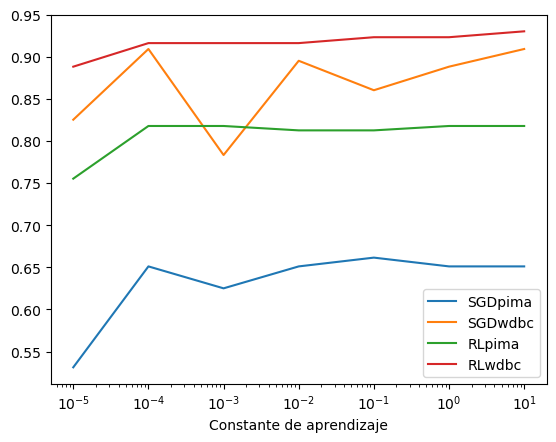

In [19]:
n_epocas = 100
gradiente = 1.0
score1_total = [] #pima RL
score2_total = [] #wdbc RL
score3_total = [] #pima SGD
score4_total = [] #wdbc SGD
valores = []
valor = 100
for i in range(7):
    valor = valor * 0.1
    valores.append(valor)

for i in valores:
    score1,score2 = getErroresLogisticRegresion(False,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,i)
    error1,error2 = getErroresSGDClassifier(False,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,i)
    score1_total.append(score1)
    score2_total.append(score2)
    score3_total.append(error1)
    score4_total.append(error2)
plotErrores(score3_total,score4_total,score1_total,score2_total,valores)


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

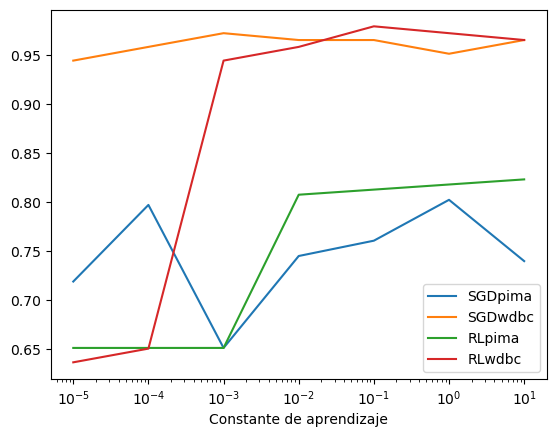

In [20]:
n_epocas = 100
gradiente = 1.0
score1_total = [] #pima RL
score2_total = [] #wdbc RL
score3_total = [] #pima SGD
score4_total = [] #wdbc SGD
valores = []
valor = 100
for i in range(7):
    valor = valor * 0.1
    valores.append(valor)

for i in valores:
    score1,score2 = getErroresLogisticRegresion(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,i)
    error1,error2 = getErroresSGDClassifier(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,i)
    score1_total.append(score1)
    score2_total.append(score2)
    score3_total.append(error1)
    score4_total.append(error2)
plotErrores(score3_total,score4_total,score1_total,score2_total,valores)


Normalizacion estabiliza los resultados, además que mejora sustancialmente los resultados para el clasificador de SGD. Esto es uno de los aspectos que si cabe destacar, ya que, en la propia documentación de la librería lo indica, que en este caso es muy recomendable que los datos de entrada sean normalizados. Respecto al resto de los datos, nada que no supieramos de antes, además de que coincide con nuestras implementaciones, cosa que refuerza nuestro desarrollo. WDBC tiene un mejor rendimiento. 
Concretamente de las gráficas superiores también podemos ver que un valor más alto de la cte de aprendizaje mejora los resultados también. Aunque no el máximo. Un termino medio, como suele ocurrir, es la opción que mejores resultados ofrece. 

##### Numero Epocas = 1000

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

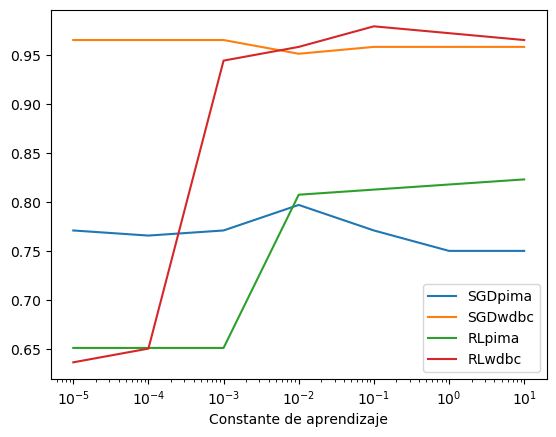

In [21]:
n_epocas = 1000
gradiente = 1.0
score1_total = [] #pima RL
score2_total = [] #wdbc RL
score3_total = [] #pima SGD
score4_total = [] #wdbc SGD
valores = []
valor = 100
for i in range(7):
    valor = valor * 0.1
    valores.append(valor)

for i in valores:
    score1,score2 = getErroresLogisticRegresion(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,i)
    error1,error2 = getErroresSGDClassifier(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,i)
    score1_total.append(score1)
    score2_total.append(score2)
    score3_total.append(error1)
    score4_total.append(error2)
plotErrores(score3_total,score4_total,score1_total,score2_total,valores)


##### Numero Epocas = 10

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

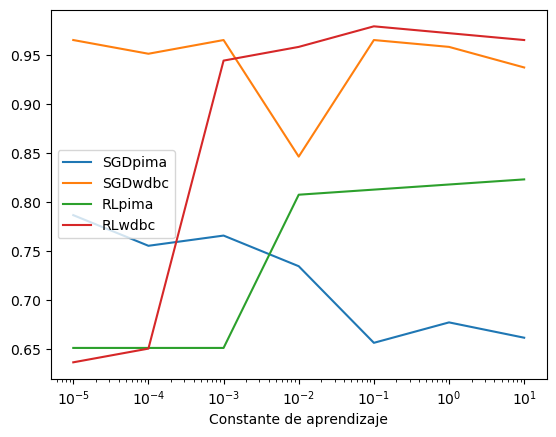

In [22]:
n_epocas = 10
gradiente = 1.0
score1_total = [] #pima RL
score2_total = [] #wdbc RL
score3_total = [] #pima SGD
score4_total = [] #wdbc SGD
valores = []
valor = 100
for i in range(7):
    valor = valor * 0.1
    valores.append(valor)

for i in valores:
    score1,score2 = getErroresLogisticRegresion(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,i)
    error1,error2 = getErroresSGDClassifier(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,i)
    score1_total.append(score1)
    score2_total.append(score2)
    score3_total.append(error1)
    score4_total.append(error2)
plotErrores(score3_total,score4_total,score1_total,score2_total,valores)


Variar el numero de epocas no supone cambios tan significativos como lo puede ser la normalización de los datos o un buen valor de la cte de aprendizaje. Lo que sí supone un problema, cosa que es de esperar, es que para un valor de n_epocas suficientemente pequeño, los resultados se vuelven más inestables. 

### Resultados Detallados

Los resultados detallados nos van a permitir tener una visión detallada del valor del error para cada dataset, con cada algoritmo de forma específica. 

In [23]:
n_epocas = 5
gradiente = 1.0

score1,score2 = getErroresLogisticRegresion(False,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
error1,error2 = getErroresSGDClassifier(False,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
print(f'El error de pima sin normalizar con el clasificador RegresionLogistica es: {1 - score1:0.2f} el error de wdbc es: {1-score2:0.2f}')
print(f'El error de pima sin normalizar con el clasificador SGDClassifier es: {1 - error2:0.2f} el error de wdbc es: {1-error2:0.2f}')

El error de pima sin normalizar con el clasificador RegresionLogistica es: 0.37 el error de wdbc es: 0.17
El error de pima sin normalizar con el clasificador SGDClassifier es: 0.12 el error de wdbc es: 0.12


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [24]:
n_epocas = 1
gradiente = 1.0

score1,score2 = getErroresLogisticRegresion(False,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
error1,error2 = getErroresSGDClassifier(False,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
print(f'El error de pima sin normalizar con el clasificador RegresionLogistica es: {1 - score1:0.2f} el error de wdbc es: {1-score2:0.2f}')
print(f'El error de pima sin normalizar con el clasificador SGDClassifier es: {1 - error2:0.2f} el error de wdbc es: {1-error2:0.2f}')

El error de pima sin normalizar con el clasificador RegresionLogistica es: 0.35 el error de wdbc es: 0.64
El error de pima sin normalizar con el clasificador SGDClassifier es: 0.10 el error de wdbc es: 0.10


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [25]:
n_epocas = 100
gradiente = 1.0

score1,score2 = getErroresLogisticRegresion(False,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
error1,error2 = getErroresSGDClassifier(False,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
print(f'El error de pima sin normalizar con el clasificador RegresionLogistica es: {1 - score1:0.2f} el error de wdbc es: {1-score2:0.2f}')
print(f'El error de pima sin normalizar con el clasificador SGDClassifier es: {1 - error2:0.2f} el error de wdbc es: {1-error2:0.2f}')

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

El error de pima sin normalizar con el clasificador RegresionLogistica es: 0.18 el error de wdbc es: 0.08
El error de pima sin normalizar con el clasificador SGDClassifier es: 0.08 el error de wdbc es: 0.08


In [26]:
n_epocas = 1000
gradiente = 1.0

score1,score2 = getErroresLogisticRegresion(False,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
error1,error2 = getErroresSGDClassifier(False,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
print(f'El error de pima sin normalizar con el clasificador RegresionLogistica es: {1 - score1:0.2f} el error de wdbc es: {1-score2:0.2f}')
print(f'El error de pima sin normalizar con el clasificador SGDClassifier es: {1 - error2:0.2f} el error de wdbc es: {1-error2:0.2f}')

El error de pima sin normalizar con el clasificador RegresionLogistica es: 0.18 el error de wdbc es: 0.06
El error de pima sin normalizar con el clasificador SGDClassifier es: 0.39 el error de wdbc es: 0.39


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [27]:
n_epocas = 100
gradiente = 0.1

score1,score2 = getErroresLogisticRegresion(False,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
error1,error2 = getErroresSGDClassifier(False,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
print(f'El error de pima sin normalizar con el clasificador RegresionLogistica es: {1 - score1:0.2f} el error de wdbc es: {1-score2:0.2f}')
print(f'El error de pima sin normalizar con el clasificador SGDClassifier es: {1 - error2:0.2f} el error de wdbc es: {1-error2:0.2f}')

El error de pima sin normalizar con el clasificador RegresionLogistica es: 0.19 el error de wdbc es: 0.08
El error de pima sin normalizar con el clasificador SGDClassifier es: 0.10 el error de wdbc es: 0.10


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [28]:
n_epocas = 100
gradiente = 0.5

score1,score2 = getErroresLogisticRegresion(False,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
error1,error2 = getErroresSGDClassifier(False,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
print(f'El error de pima sin normalizar con el clasificador RegresionLogistica es: {1 - score1:0.2f} el error de wdbc es: {1-score2:0.2f}')
print(f'El error de pima sin normalizar con el clasificador SGDClassifier es: {1 - error2:0.2f} el error de wdbc es: {1-error2:0.2f}')

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

El error de pima sin normalizar con el clasificador RegresionLogistica es: 0.18 el error de wdbc es: 0.08
El error de pima sin normalizar con el clasificador SGDClassifier es: 0.16 el error de wdbc es: 0.16


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
n_epocas = 10
gradiente = 1.0

score1_1,score2_1 = getErroresLogisticRegresion(False,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
error1,error2 = getErroresSGDClassifier(False,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
print(f'El error de pima normalizando con el clasificador RegresionLogistica es: {1 - score1_1:0.2f} el error de wdbc es: {1-score2_1:0.2f}')
print(f'El error de pima normalizando con el clasificador SGDClassifier es: {1 - error2:0.2f} el error de wdbc es: {1-error2:0.2f}')

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

El error de pima normalizando con el clasificador RegresionLogistica es: 0.32 el error de wdbc es: 0.10
El error de pima normalizando con el clasificador SGDClassifier es: 0.15 el error de wdbc es: 0.15


/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [30]:
n_epocas = 5
gradiente = 1.0

score1,score2 = getErroresLogisticRegresion(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
error1,error2 = getErroresSGDClassifier(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
print(f'El error de pima normalizando con el clasificador RegresionLogistica es: {1 - score1:0.2f} el error de wdbc es: {1-score2:0.2f}')
print(f'El error de pima normalizando con el clasificador SGDClassifier es: {1 - error2:0.2f} el error de wdbc es: {1-error2:0.2f}')

El error de pima normalizando con el clasificador RegresionLogistica es: 0.19 el error de wdbc es: 0.03
El error de pima normalizando con el clasificador SGDClassifier es: 0.03 el error de wdbc es: 0.03


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [31]:
n_epocas = 1
gradiente = 1.0

score1,score2 = getErroresLogisticRegresion(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
error1,error2 = getErroresSGDClassifier(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
print(f'El error de pima normalizando con el clasificador RegresionLogistica es: {1 - score1:0.2f} el error de wdbc es: {1-score2:0.2f}')
print(f'El error de pima normalizando con el clasificador SGDClassifier es: {1 - error2:0.2f} el error de wdbc es: {1-error2:0.2f}')

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

El error de pima normalizando con el clasificador RegresionLogistica es: 0.20 el error de wdbc es: 0.05
El error de pima normalizando con el clasificador SGDClassifier es: 0.06 el error de wdbc es: 0.06


/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [32]:
n_epocas = 100
gradiente = 1.0

score1,score2 = getErroresLogisticRegresion(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
error1,error2 = getErroresSGDClassifier(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
print(f'El error de pima normalizando con el clasificador RegresionLogistica es: {1 - score1:0.2f} el error de wdbc es: {1-score2:0.2f}')
print(f'El error de pima normalizando con el clasificador SGDClassifier es: {1 - error2:0.2f} el error de wdbc es: {1-error2:0.2f}')

El error de pima normalizando con el clasificador RegresionLogistica es: 0.18 el error de wdbc es: 0.03
El error de pima normalizando con el clasificador SGDClassifier es: 0.05 el error de wdbc es: 0.05


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
n_epocas = 1000
gradiente = 1.0

score1,score2 = getErroresLogisticRegresion(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
error1,error2 = getErroresSGDClassifier(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
print(f'El error de pima normalizando con el clasificador RegresionLogistica es: {1 - score1:0.2f} el error de wdbc es: {1-score2:0.2f}')
print(f'El error de pima normalizando con el clasificador SGDClassifier es: {1 - error2:0.2f} el error de wdbc es: {1-error2:0.2f}')

El error de pima normalizando con el clasificador RegresionLogistica es: 0.18 el error de wdbc es: 0.03
El error de pima normalizando con el clasificador SGDClassifier es: 0.04 el error de wdbc es: 0.04


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
n_epocas = 100
gradiente = 0.1

score1,score2 = getErroresLogisticRegresion(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
error1,error2 = getErroresSGDClassifier(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
print(f'El error de pima normalizando con el clasificador RegresionLogistica es: {1 - score1:0.2f} el error de wdbc es: {1-score2:0.2f}')
print(f'El error de pima normalizando con el clasificador SGDClassifier es: {1 - error2:0.2f} el error de wdbc es: {1-error2:0.2f}')

El error de pima normalizando con el clasificador RegresionLogistica es: 0.19 el error de wdbc es: 0.02
El error de pima normalizando con el clasificador SGDClassifier es: 0.03 el error de wdbc es: 0.03


/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
n_epocas = 100
gradiente = 0.5

score1,score2 = getErroresLogisticRegresion(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
error1,error2 = getErroresSGDClassifier(True,'ConjuntosDatosP2/pima-indians-diabetes.csv','ConjuntosDatosP2/wdbc.csv',n_epocas,gradiente)
print(f'El error de pima normalizando con el clasificador RegresionLogistica es: {1 - score1:0.2f} el error de wdbc es: {1-score2:0.2f}')
print(f'El error de pima normalizando con el clasificador SGDClassifier es: {1 - error2:0.2f} el error de wdbc es: {1-error2:0.2f}')

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El error de pima normalizando con el clasificador RegresionLogistica es: 0.18 el error de wdbc es: 0.01
El error de pima normalizando con el clasificador SGDClassifier es: 0.03 el error de wdbc es: 0.03


Los resultados son muy similares entre ellos, no es crítico el valor de estos parámetros (siempre dentro de unos límites).

## Apartado 3: Análisis espacio de ROC entre Naive Bayes, KNN y Regresión Logística para wdbc y pima-indians:

In [4]:
from Clasificador import *
from ClasificadorKNN import *
from Datos import Datos
from Clasificador import *
import EstrategiaParticionado as EstrategiaParticionado
import RegresionLogistica as rl
import numpy as np
import matplotlib.pyplot as plt

Para el análisis de los datasets con cualquier clasificador, lo que hacemos es sacar la matriz de confusión de cada una de las ejecuciones de los clasificadores, esto lo hacemos a traves de score, el cual almacena su propia matriz dentro de su clasificador. Dentro de la matriz podemos distinguir True Positives (TP), False Positive (FP), True Negatives (TN) y False Negative (FN). En la matriz son así:

| TP | FN |  
| FP | TN |

A través de la fórmulas:

TPR = TP / (TP+FN)  

FNR = FN / (TP+FN)  

FPR = FP / (FP+TN)  

TNR = TN / (FP+TN)  

Siendo True Positive Rate (TPR), True Negative Rate (TPR), False Positive Rate (FPR) y False Negative Rate (FNR). Estos son los ratios de cada uno de los posibles resultados. Usando el TPR y FPR en una gráfica con dos dimensiones, podemos clasificar los distintos clasificadores en la gráfica según los resultados obtenidos como se verá más tarde.

Ahora vamos a sacar las matrices de confusión para Naive Bayes, KNN y Regresión Logística y sus TPR, TNR, FPR y FNR para el cálculo de los espacios ROC con el dataset wdbc:

### Para wdbc:

In [37]:
dataset = Datos('ConjuntosDatosP2/wdbc.csv')

#### Matriz para Naive Bayes:

In [38]:
from Datos import Datos

clasificador1 = ClasificadorNaiveBayes()
dataset = Datos('ConjuntosDatosP2/wdbc.csv')

validacionSimple = EstrategiaParticionado.ValidacionSimple(10,3)
validacionCruzada = EstrategiaParticionado.ValidacionCruzada(4)

error = []

error += clasificador1.validacion(validacionCruzada, dataset, clasificador1)

print(f"Los valores de la matriz de confusion para este primer dataset es: \n{clasificador1.matrizConfusion[0][0]}  {clasificador1.matrizConfusion[0][1]}\n{clasificador1.matrizConfusion[1][0]}  {clasificador1.matrizConfusion[1][1]}")


Los valores de la matriz de confusion para este primer dataset es: 
18.0  3.0
79.0  42.0


#### Matriz para K-NN:

##### Sin normalizar:

In [39]:

clasificador2 = ClasificadorKNN()
dataset = Datos('ConjuntosDatosP2/wdbc.csv')

validacionSimple = EstrategiaParticionado.ValidacionSimple(25,5)
validacionCruzada = EstrategiaParticionado.ValidacionCruzada(4)

K = 3
errores = []
for j in range(3):
    validacionSimple.creaParticiones(dataset.datos)

    for i in range(5):
        
        predicciones = clasificador2.clasifica(dataset.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset.nominalAtributos,K)

        error = clasificador2.error(dataset.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores.append(error) 
print(f'Media de los errores sin normalizar: {np.mean(errores) * 100}%')

print(f"Los valores de la matriz de confusion y datos sin normalizar para este primer dataset es: \n{clasificador2.matrizConfusion[0][0]}  {clasificador2.matrizConfusion[0][1]}\n{clasificador2.matrizConfusion[1][0]}  {clasificador2.matrizConfusion[1][1]}")

Media de los errores sin normalizar: 7.276995305164319%
Los valores de la matriz de confusion y datos sin normalizar para este primer dataset es: 
91.0  5.0
6.0  40.0


##### Normalizado:

In [40]:
clasificador3 = ClasificadorKNN()
dataset = Datos('ConjuntosDatosP2/wdbc.csv')

dataset.datos = clasificador3.entrenamiento(dataset.datos, dataset.nominalAtributos)

errores = []
for j in range(3):
    dataset = Datos('ConjuntosDatosP2/wdbc.csv')
    validacionSimple.creaParticiones(dataset.datos)
    dataset.datos = clasificador3.entrenamiento(dataset.datos, dataset.nominalAtributos)

    for i in range(5):
    
        predicciones = clasificador3.clasifica(dataset.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset.nominalAtributos,K)
        
        error = clasificador3.error(dataset.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores.append(error) 
print(f'Media de los errores normalizando: {np.mean(errores) * 100}%')

print(f"Los valores de la matriz de confusion para este primer dataset es: \n{clasificador3.matrizConfusion[0][0]}  {clasificador3.matrizConfusion[0][1]}\n{clasificador3.matrizConfusion[1][0]}  {clasificador3.matrizConfusion[1][1]}")

Media de los errores normalizando: 3.286384976525822%
Los valores de la matriz de confusion para este primer dataset es: 
91.0  3.0
0.0  48.0


#### Regresión Logística:

Sin normalizar:

In [6]:
clasificador4 = rl.RegresionLogistica()
dataset = Datos('ConjuntosDatosP2/wdbc.csv')
n_epocas = 10
gradiente = 1
erroresPima_1_10_noNormalizado = clasificador4.dameError(dataset,n_epocas,gradiente,False)
print(f'El error para pima es: {erroresPima_1_10_noNormalizado:.2f}%')
print(f"Los valores de la matriz de confusion para este primer dataset es: \n{clasificador4.matrizConfusion[0][0]}  {clasificador4.matrizConfusion[0][1]}\n{clasificador4.matrizConfusion[1][0]}  {clasificador4.matrizConfusion[1][1]}")

El error para pima es: 15.68%
Los valores de la matriz de confusion para este primer dataset es: 
17.0  95.0
30.0  0.0


Normalizado:

In [7]:
clasificador5 = rl.RegresionLogistica()
dataset = Datos('ConjuntosDatosP2/wdbc.csv')
n_epocas = 10
gradiente = 1
erroresPima_1_10_normalizado = clasificador5.dameError(dataset,n_epocas,gradiente,True)
print(f'El error para pima es: {erroresPima_1_10_normalizado:.2f}%')
print(f"Los valores de la matriz de confusion para este primer dataset es: \n{clasificador5.matrizConfusion[0][0]}  {clasificador5.matrizConfusion[0][1]}\n{clasificador5.matrizConfusion[1][0]}  {clasificador5.matrizConfusion[1][1]}")

El error para pima es: 3.58%
Los valores de la matriz de confusion para este primer dataset es: 
4.0  85.0
51.0  2.0


### Espacio ROC:

Ahora con todos estos datos podemos calcular el TPR y FPR de cada uno de los datasets, con ellos clasificamos el punto que representa al clasificador en el espacio ROC siendo para las coordenadas X e Y (FPR,TPR). Con esto vemos que clasificadores quedan por encima de línea de corte y cuales obtienen los mejores resultados.

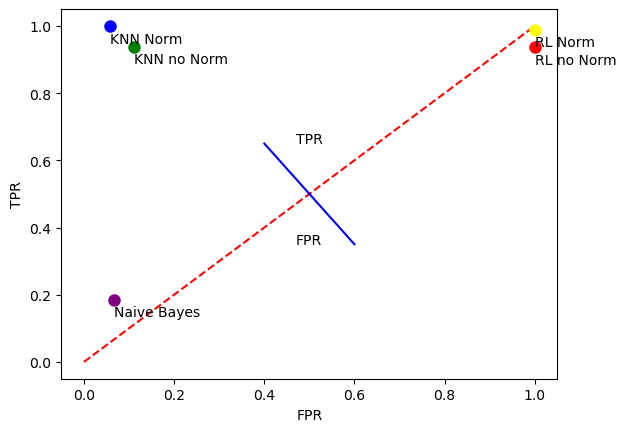

In [ ]:
plt.plot([0,1],[0,1], color='red', linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.annotate("TPR", (0.47,0.65))
plt.plot([0.5,0.6],[0.5,0.35], color='blue')
plt.annotate("FPR", (0.47,0.35))
plt.plot([0.5,0.4],[0.5,0.65], color='blue')
plt.annotate("Naive Bayes", (clasificador1.FPR, clasificador1.TPR-0.05))
plt.plot(clasificador1.FPR, clasificador1.TPR, marker='o', markersize=8, color="purple")
plt.annotate("KNN no Norm", (clasificador2.FPR, clasificador2.TPR-0.05))
plt.plot(clasificador2.FPR, clasificador2.TPR, marker='o', markersize=8, color="green")
plt.annotate("KNN Norm", (clasificador3.FPR, clasificador3.TPR-0.05))
plt.plot(clasificador3.FPR, clasificador3.TPR, marker='o', markersize=8, color="blue")
plt.annotate("RL no Norm", (clasificador4.FPR, clasificador4.TPR-0.05))
plt.plot(clasificador4.FPR, clasificador4.TPR, marker='o', markersize=8, color="red")
plt.annotate("RL Norm", (clasificador5.FPR, clasificador5.TPR-0.05))
plt.plot(clasificador5.FPR, clasificador5.TPR, marker='o', markersize=8, color="yellow")
plt.show()

Aquí podemos observar la gráfica del espacio ROC para wdbc, si algo se encuentra en el área de arriba a la izquierda es que su TPR ha sido mayor que su FPR, es decir, que ha tenido más aciertos que fallos en cuanto a las prediciones positivas, podríamos decir que si se encuentra debajo o encima del corte no ha sido de utilidad, ya que se ha equivocado más que acertado.

En nuestra ejecución lo más común es que casi siempre todos los clasificadores menos Naive Bayes tenga un buen TPR, Naive Bayes sin embargo al ser una primera versión cuando no se tenía mucho conocimiento de la asignatura suele quedar más rezagado y en un punto medio.

Ahora vamos a sacar las matrices de confusión para Naive Bayes, KNN y Regresión Logística y sus TPR, TNR, FPR y FNR para el cálculo de los espacios ROC con el dataset pima-indians-diabetes:

### Para pima-indians-diabetes:

In [44]:
dataset = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')

#### Matriz para Naive Bayes:

In [45]:
from Datos import Datos

dataset = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
clasificador1 = ClasificadorNaiveBayes()

validacionSimple = EstrategiaParticionado.ValidacionSimple(10,3)
validacionCruzada = EstrategiaParticionado.ValidacionCruzada(4)

error = []

error += clasificador1.validacion(validacionCruzada, dataset, clasificador1)

print(f"Los valores de la matriz de confusion para este primer dataset es: \n{clasificador1.matrizConfusion[0][0]}  {clasificador1.matrizConfusion[0][1]}\n{clasificador1.matrizConfusion[1][0]}  {clasificador1.matrizConfusion[1][1]}")


Los valores de la matriz de confusion para este primer dataset es: 
31.0  84.0
34.0  43.0


#### Matriz para K-NN:

##### Sin normalizar:

In [46]:
clasificador2 = ClasificadorKNN()
dataset = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
validacionSimple = EstrategiaParticionado.ValidacionSimple(25,5)
validacionCruzada = EstrategiaParticionado.ValidacionCruzada(4)

K = 3
errores = []
for j in range(3):
    validacionSimple.creaParticiones(dataset.datos)

    for i in range(5):
        
        predicciones = clasificador2.clasifica(dataset.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset.nominalAtributos,K)

        error = clasificador2.error(dataset.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores.append(error) 
print(f'Media de los errores sin normalizar: {np.mean(errores) * 100}%')

print(f"Los valores de la matriz de confusion y datos sin normalizar para este primer dataset es: \n{clasificador2.matrizConfusion[0][0]}  {clasificador2.matrizConfusion[0][1]}\n{clasificador2.matrizConfusion[1][0]}  {clasificador2.matrizConfusion[1][1]}")

Media de los errores sin normalizar: 30.798611111111114%
Los valores de la matriz de confusion y datos sin normalizar para este primer dataset es: 
32.0  25.0
41.0  94.0


##### Normalizado:

In [47]:
clasificador3 = ClasificadorKNN()
dataset = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')

dataset.datos = clasificador3.entrenamiento(dataset.datos, dataset.nominalAtributos)

errores = []
for j in range(3):
    dataset = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
    validacionSimple.creaParticiones(dataset.datos)
    dataset.datos = clasificador3.entrenamiento(dataset.datos, dataset.nominalAtributos)

    for i in range(5):
    
        predicciones = clasificador3.clasifica(dataset.extraeDatos(validacionSimple.particiones[i].indicesTest), dataset.extraeDatos(validacionSimple.particiones[i].indicesTrain),dataset.nominalAtributos,K)
        
        error = clasificador3.error(dataset.extraeDatos(validacionSimple.particiones[i].indicesTest),predicciones)

        errores.append(error) 
print(f'Media de los errores normalizando: {np.mean(errores) * 100}%')

print(f"Los valores de la matriz de confusion para este primer dataset es: \n{clasificador3.matrizConfusion[0][0]}  {clasificador3.matrizConfusion[0][1]}\n{clasificador3.matrizConfusion[1][0]}  {clasificador3.matrizConfusion[1][1]}")

Media de los errores normalizando: 26.354166666666668%
Los valores de la matriz de confusion para este primer dataset es: 
31.0  26.0
22.0  113.0


#### Regresión Logística:

Sin normalizar:

In [48]:
clasificador4 = rl.RegresionLogistica()
dataset = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
n_epocas = 10
gradiente = 1
erroresPima_1_10_noNormalizado = clasificador4.dameError(dataset,n_epocas,gradiente,False)
print(f'El error para pima es: {erroresPima_1_10_noNormalizado:.2f}%')
print(f"Los valores de la matriz de confusion para este primer dataset es: \n{clasificador4.matrizConfusion[0][0]}  {clasificador4.matrizConfusion[0][1]}\n{clasificador4.matrizConfusion[1][0]}  {clasificador4.matrizConfusion[1][1]}")

El error para pima es: 42.63%
Los valores de la matriz de confusion para este primer dataset es: 
59.0  109.0
5.0  19.0


Normalizado:

In [49]:
clasificador5 = rl.RegresionLogistica()
dataset = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
n_epocas = 10
gradiente = 1
erroresPima_1_10_normalizado = clasificador5.dameError(dataset,n_epocas,gradiente,True)
print(f'El error para pima es: {erroresPima_1_10_normalizado:.2f}%')
print(f"Los valores de la matriz de confusion para este primer dataset es: \n{clasificador5.matrizConfusion[0][0]}  {clasificador5.matrizConfusion[0][1]}\n{clasificador5.matrizConfusion[1][0]}  {clasificador5.matrizConfusion[1][1]}")

El error para pima es: 30.71%
Los valores de la matriz de confusion para este primer dataset es: 
45.0  22.0
30.0  95.0


### Espacio ROC:

Volvemos a calcular el espacio para cada uno de los clasificadores con este nuevo dataset:

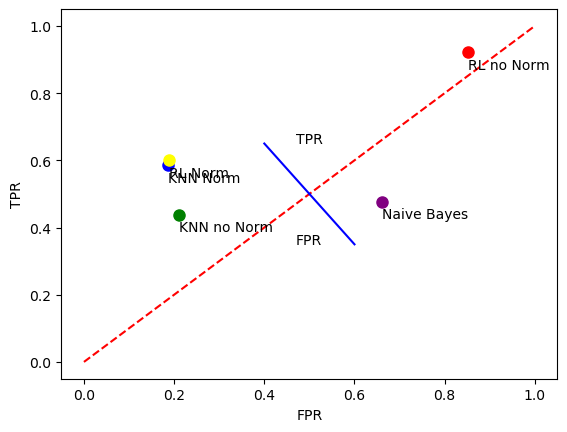

In [50]:
plt.plot([0,1],[0,1], color='red', linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.annotate("TPR", (0.47,0.65))
plt.plot([0.5,0.6],[0.5,0.35], color='blue')
plt.annotate("FPR", (0.47,0.35))
plt.plot([0.5,0.4],[0.5,0.65], color='blue')
plt.annotate("Naive Bayes", (clasificador1.FPR, clasificador1.TPR-0.05))
plt.plot(clasificador1.FPR, clasificador1.TPR, marker='o', markersize=8, color="purple")
plt.annotate("KNN no Norm", (clasificador2.FPR, clasificador2.TPR-0.05))
plt.plot(clasificador2.FPR, clasificador2.TPR, marker='o', markersize=8, color="green")
plt.annotate("KNN Norm", (clasificador3.FPR, clasificador3.TPR-0.05))
plt.plot(clasificador3.FPR, clasificador3.TPR, marker='o', markersize=8, color="blue")
plt.annotate("RL no Norm", (clasificador4.FPR, clasificador4.TPR-0.05))
plt.plot(clasificador4.FPR, clasificador4.TPR, marker='o', markersize=8, color="red")
plt.annotate("RL Norm", (clasificador5.FPR, clasificador5.TPR-0.05))
plt.plot(clasificador5.FPR, clasificador5.TPR, marker='o', markersize=8, color="yellow")
plt.show()

Ahora tenemos la gráfica del espacio ROC de pima-indians-diabetes, como se puede tiene más variación según los clasificadores, Naive Bayes por las mismas razones de antes sigue siendo el peor y sigue estando en peor lugar de forma normal. Aun así los demás casi siempre tiene un buen TPR.

## Apartado 4: Curva ROC y análisis de área AUC para Regresión Logística:

- Para la creación de la curva ROC vamos a utilizar el método que consiste en realizar la ejecución de el clasificador de Regresión Logística y guardar el resultado de cada de los scores. Al final de la ejecución, cuando se tengan todos, procedemos a ordenarlos de mayor a menor para luego plasmarlo en la gráfica y asi obtener una curva que inicia en (0,0) y avanza hacia arriba y la derecha. Ya que, para ello si la predicción era positiva y el resultado era realmente positivo se avanzará hacia arriba, en caso contrario se avanzará a la derecha. Esto creará una curva cuyo destino sera el punto (1,1) y es lo que se llama curva ROC.

- La línea que hay en medio representaría el peor caso y es que el algoritmo haya acertado y fallado la mitad y si estuviera por debajo significa que falla más que acierta, si esto ocurriera significa que el algoritmo no es válido y no es útil.

- Una ejecución perfecta, llegaría al punto (0,1), esto es porque significaría que el algoritmo no ha tenido ni un solo error, pero esto por lo general es imposible.

Guardamos los scores dados y los ordenamos con la función sort de numpy, luego recorremos toda la lista y usamos el FPR para las coordenadas X y el TPR para la Y, es decir, (FPR,TPR). Con esto formamos la curva ROC del gráfico.

Creamos la curva ROC para el dataset pima-indians-diabetes:

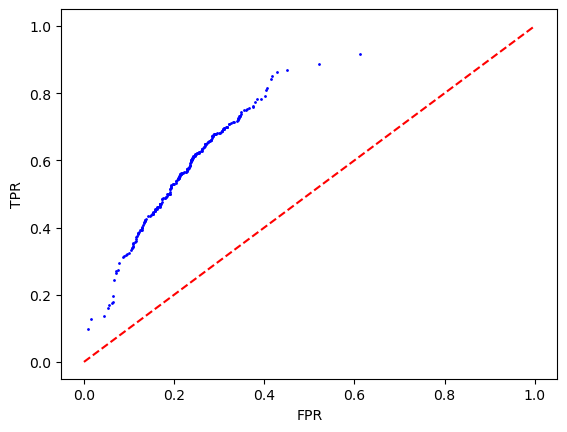

In [61]:
clasificador5 = rl.RegresionLogistica()
dataset = Datos('ConjuntosDatosP2/pima-indians-diabetes.csv')
n_epocas = 10
gradiente = 1
erroresPima_1_10_normalizado = clasificador5.dameError(dataset,n_epocas,gradiente,True)

plt.plot([0,1],[0,1], color='red', linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")

sortedTPRs = np.sort(clasificador5.TPRs)
sortedFPRs = np.sort(clasificador5.FPRs)

for i in range(len(clasificador5.TPRs)):
    plt.plot(sortedFPRs[i], sortedTPRs[i], marker='o', markersize=1, color="blue")
    
plt.show()

- Como se puede ver en la gráfica, los puntos van de la zona cercana a (0,0) hasta (1,1) ya que fueron ordenados, si los unieramos con una línea tendríamos una curva, esta sería la curva ROC, el área que quedaría debajo de la curva se le conoce como AUC (Area Under the Curve). Cuanto mayor es el área, mejor será el rendimiento del algoritmo, ya que cuanto más cerca del (0,1) mejor es, que sería el rendimiento perfecto.

- En resumen, con nuestro algoritmo hemos conseguido una ejecución media, que no es para nada perfecta, pero si que tiene un rendimiento que está por encima de la línea de corte por lo que es útil y clasifica bien.

Pruebo a crear la curva ROC para el dataset de wdbc:

TP: 81.0
FP: 4.0
FN: 2.0
TN: 55.0


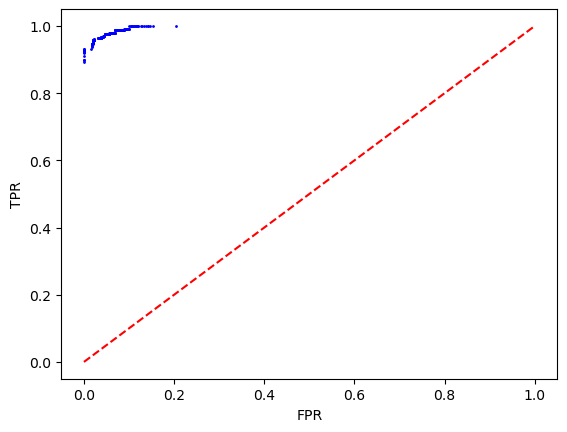

In [4]:
clasificador5 = rl.RegresionLogistica()
dataset = Datos('ConjuntosDatosP2/wdbc.csv')
n_epocas = 10
gradiente = 1
erroresWdbc_1_10_normalizado = clasificador5.dameError(dataset,n_epocas,gradiente,True)

print("TP:", clasificador5.matrizConfusion[0][0])
print("FP:", clasificador5.matrizConfusion[0][1])
print("FN:", clasificador5.matrizConfusion[1][0])
print("TN:", clasificador5.matrizConfusion[1][1])

plt.plot([0,1],[0,1], color='red', linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")

for i in range(len(clasificador5.TPRs)):
    plt.plot(sortedFPRs[i], sortedTPRs[i], marker='o', markersize=1, color="blue")
    
plt.show()

Si observamos la gráfica nos damos cuenta que para el dataset de wdbc nuestra Regresion Logística funciona de una manera muy eficiente ya que FPR apenas suele llegar al 0.2. Esto quiere decir que tiene un gran ratio de TPR, ya que detecta casi todos los positivos como positivos. Es decir, para este dataset nuestra Regresión Logística funciona de una manera muy eficiente y es muy eficaz, obteniendo resultados muy cerca del (1,1).